# Experiment results
In this notebook we will explore the experiment results for the solving of quantified formulas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
handelman_d1 = pd.read_csv('handelman-templates-deg-1-z3.csv')
skolem = pd.read_csv('z3-skolemization-z3.csv')

In [3]:
handelman_d1.head()

,file,status,conversion_time,solver_time,num_forall_vars,num_exists_vars,num_switches
0,instance_10.smt2,CORRECT,0.010128,0.131616,1.0,1.0,2.0
1,instance_6.smt2,CORRECT,0.016896,0.071279,0.0,1.0,1.0
2,instance_83.smt2,CORRECT,0.041650,0.069959,4.0,5.0,9.0
3,instance_21.smt2,CORRECT,0.022363,0.070166,1.0,2.0,3.0
4,instance_43.smt2,CORRECT,0.035524,0.082727,2.0,3.0,5.0


First we will look at how many formulas were solved correctly for different characteristics of the formula. We will look at:
- Total number of quantified variables
- Number of universally quantified variables
- Number of existentially quantified variables
- Number of switches between universal and existential quantifiers

For this we will look at the fraction of `correctly / total` number of samples and divide this by the overall number of solved examples of the solver, in order to figure out characteristics of the formulas a solver is suited for.

In [18]:
# Add total vars variable
handelman_d1["num_total_vars"] = handelman_d1["num_forall_vars"] + handelman_d1["num_exists_vars"]
skolem["num_total_vars"] = skolem["num_forall_vars"] + skolem["num_exists_vars"]

In [19]:
def draw_counts_plot(variable):
    handelman_d1_correct = handelman_d1[handelman_d1['status'] == 'CORRECT']
    handelman_total_value_counts = handelman_d1[variable].value_counts().sort_index()
    handelman_correct_value_counts = handelman_d1_correct[variable].value_counts().sort_index()
    normalized_handelman = (handelman_correct_value_counts / handelman_total_value_counts)


    skolem_correct = skolem[skolem['status'] == 'CORRECT']
    skolem_total_value_counts = skolem[variable].value_counts().sort_index()
    skolem_correct_value_counts = skolem_correct[variable].value_counts().sort_index()
    normalized_skolem = (skolem_correct_value_counts / skolem_total_value_counts)

    # All available values of num_total_vars
    all_values = set(normalized_handelman.index).union(set(normalized_skolem.index))
    normalized_handelman = normalized_handelman.fillna(0)
    normalized_skolem = normalized_skolem.fillna(0)
    normalized_handelman = normalized_handelman.reindex(all_values, fill_value=0)
    normalized_skolem = normalized_skolem.reindex(all_values, fill_value=0)

    normalized_handelman = normalized_handelman.sort_index()
    normalized_skolem = normalized_skolem.sort_index()

    plt.plot(normalized_handelman, label='Handelman')
    plt.plot(normalized_skolem, label='Skolem')
    plt.xlabel(variable)
    plt.ylabel('Proportional fraction of correct instances')
    plt.legend()
    plt.show()

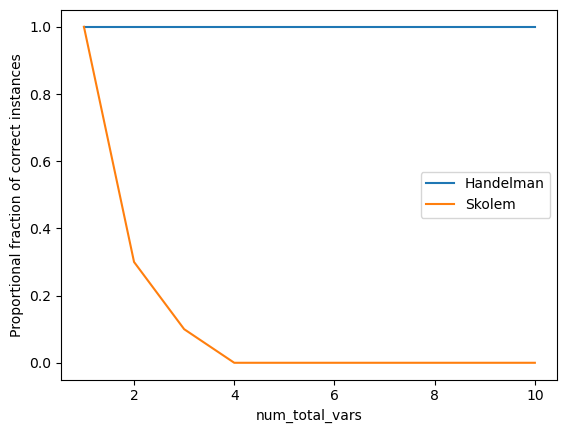

In [20]:
draw_counts_plot('num_total_vars')

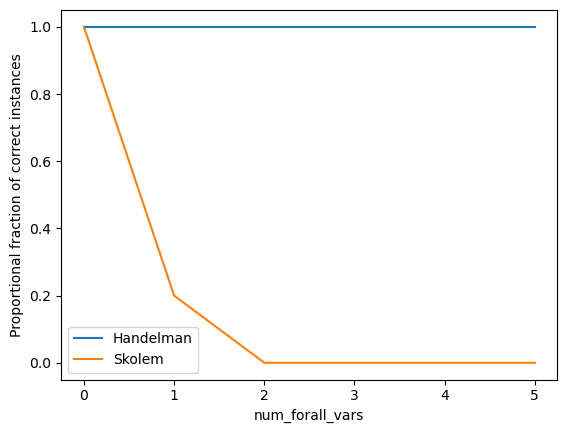

In [21]:
draw_counts_plot('num_forall_vars')

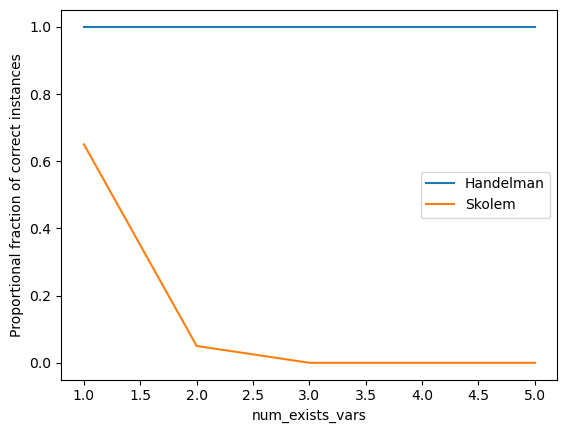

In [22]:
draw_counts_plot('num_exists_vars')

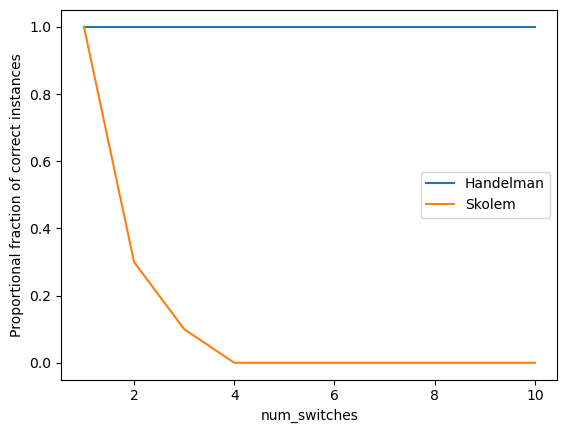

In [23]:
draw_counts_plot('num_switches')

# Overall comparative analysis
Here we will compare the distribution of outcomes for all the configurations we experimented with.

In [10]:
data_files = {
    'Farkas Mathsat': 'farkas-templates-deg-1-mathsat.csv',
    'Farkas Z3': 'farkas-templates-deg-1-z3.csv',
    'Handelman deg 1 Mathsat': 'handelman-templates-deg-1-mathsat.csv',
    'Handelman deg 1 Z3': 'handelman-templates-deg-1-z3.csv',
    'Handelman deg 2 Mathsat': 'handelman-templates-deg-2-mathsat.csv',
    'Handelman deg 2 Z3': 'handelman-templates-deg-2-z3.csv',
    'Skolem deg 1 Z3': 'z3-skolemization-templates-deg-1-z3.csv',
    'Skolem deg 2 Z3': 'z3-skolemization-templates-deg-2-z3.csv',
    'Skolem Z3': 'z3-skolemization-z3.csv'
}

RESULTS = ['CORRECT', 'INCORRECT', 'CONVERSION_TIMEOUT', 'SOLVER_TIMEOUT', 'TIMEOUT', 'PARSING_ERROR', 'BUG', 'BUG2']

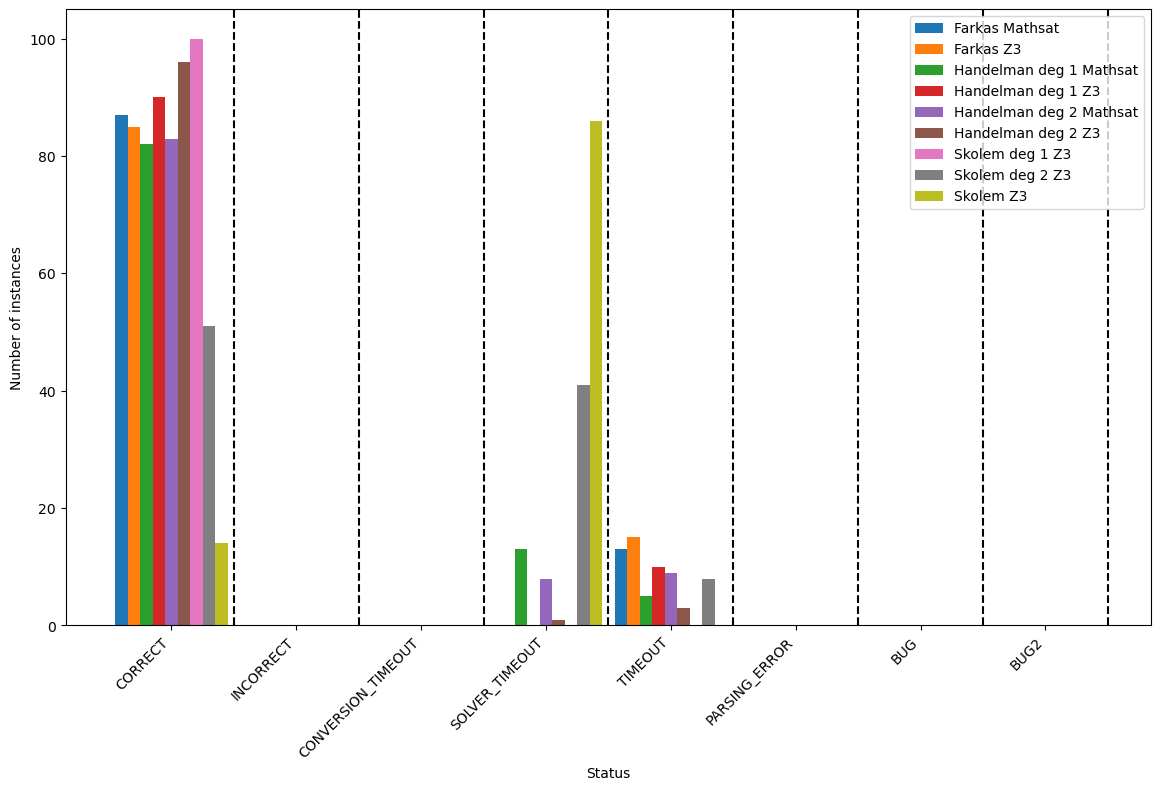

In [11]:
# Make a plot with grouped bars for the value counts of 'status' for each solver
status_counts = {}

for label, file_name in data_files.items():
    df = pd.read_csv(file_name)
    grouped = df['status'].value_counts().reindex(RESULTS, fill_value=0)
    status_counts[label] = grouped

status_df = pd.DataFrame(status_counts)


n_results = len(RESULTS)
bar_width = 0.1
x_indices = np.arange(n_results)

fig, ax = plt.subplots(figsize=(14, 8))
for i, (label, counts) in enumerate(status_df.items()):
    ax.bar(x_indices + i * bar_width - (bar_width * (len(data_files) - 1) / 2), counts, width=bar_width, label=label)

ax.set_ylabel('Number of instances')
ax.set_xlabel('Status')
ax.set_xticks(x_indices)
ax.set_xticklabels(RESULTS, rotation=45, ha='right')
ax.legend()

# Add vertical lines to separate the solvers
for i in range(1, 9):
    plt.axvline(x=i - 0.5, color='black', linestyle='--')

plt.show()


# Uniqueness Analysis
In this section we will visualize how much overlap there is between the solvers in terms of the unique instances they solve.

In [12]:
skolem = pd.read_csv('z3-skolemization-z3.csv')
farkas_m1 = pd.read_csv('farkas-templates-deg-1-mathsat.csv')

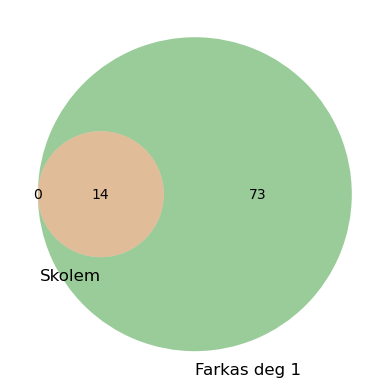

In [13]:
skolem_files = skolem[skolem['status'] == 'CORRECT']['file'].unique()
farkas_m1_files = farkas_m1[farkas_m1['status'] == 'CORRECT']['file'].unique()

# Take the intersection of the two sets of files
common_files = np.intersect1d(skolem_files, farkas_m1_files)

from matplotlib_venn import venn2

venn2(subsets=(len(skolem_files) - len(common_files), len(farkas_m1_files) - len(common_files), len(common_files)), set_labels=('Skolem', 'Farkas deg 1'))
plt.show()


# Total solved with Polyhorn

In [14]:
data_files = {
    'Farkas Mathsat': 'farkas-templates-deg-1-mathsat.csv',
    'Farkas Z3': 'farkas-templates-deg-1-z3.csv',
    'Handelman deg 1 Mathsat': 'handelman-templates-deg-1-mathsat.csv',
    'Handelman deg 1 Z3': 'handelman-templates-deg-1-z3.csv',
    'Handelman deg 2 Mathsat': 'handelman-templates-deg-2-mathsat.csv',
    'Handelman deg 2 Z3': 'handelman-templates-deg-2-z3.csv',
}

In [15]:
files = set()

for label, file_name in data_files.items():
    df = pd.read_csv(file_name)
    files.update(df[df['status'] == 'CORRECT']['file'].unique())

print(f'Number of unique files: {len(files)}')

Number of unique files: 100
